# Solution Notebook

In [9]:
import numpy as np                             
import pandas as pd                             
import matplotlib.pyplot as plt                             
import seaborn as sns
import string
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, Adam 
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

In [2]:
data = pd.read_csv(r'data/A_Z Handwritten Data.csv').astype('float32')
print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

In [3]:
X = data.drop('0',axis=1)
y = data['0']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [4]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [5]:
train_yOHE = to_categorical(train_y, num_classes = 26)
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26)
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


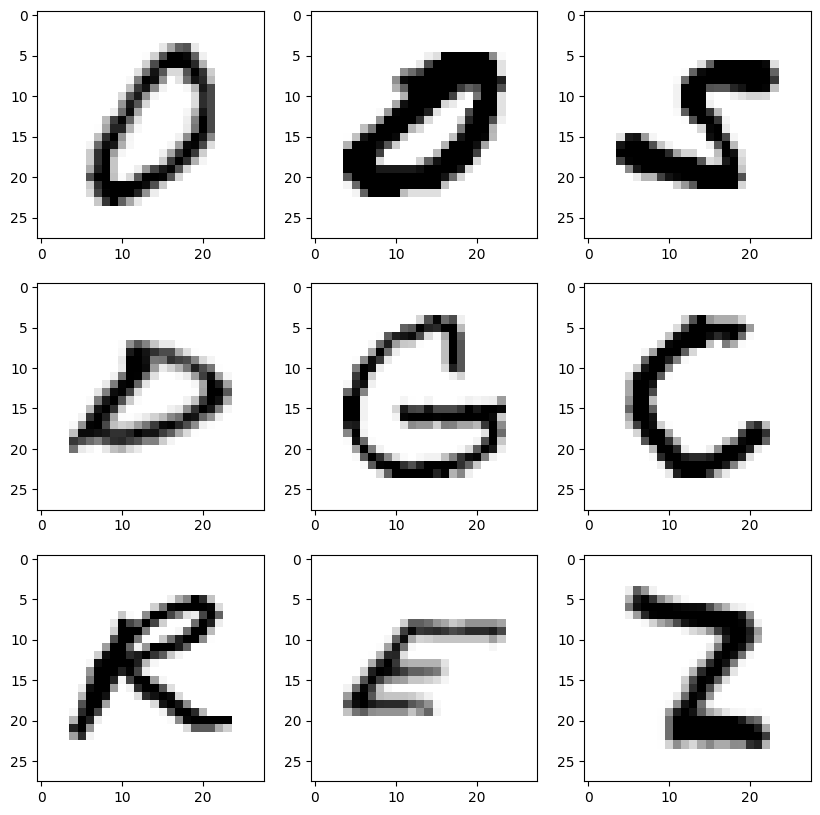

In [6]:
shuffler = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize=(10,10))
axes = ax.flatten()
cutoff = 0
for i in range(9):
    axes[i].imshow(shuffler[i], cmap='Greys')

plt.show()
fig.savefig(f'{cutoff} image.png')

In [7]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# train_x = train_x.reshape(train_x.shape[0],-1)
# test_x = test_x.reshape(test_x.shape[0], -1)



# knn = KNeighborsClassifier(n_neighbors=3)

# knn.fit(train_x, y_train)

# y_pred = knn.predict(test_x)

# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy:{accuracy*100:.2f}%')

In [11]:
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

/Users/timothy/NEU Work/ALY6020/Coding Assignments/mod5/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# model.compile(optimizer='adam', 
#               loss=SCC(),
#               metrics=['accuracy'])
# history = model.fit(train_x, y_train, epochs=10, 
#                     validation_data=(test_x, y_test),
#                    verbose=True)
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [ ]:
history = model.fit(train_X, train_yOHE, epochs=1, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE), verbose=True)


model.summary()
model.save(r'model_hand.h5')